In [1]:
import os
from art import aggregators
from art import scores
from art import significance_tests
import pandas as pd
import ast

In [2]:
beta_10_N_25 = pd.read_csv('all_scores_modified_greedy_approach_karpathy_test_metrics_gamma_20_beta_0.1.csv')['REFCLIP_SCORE']
beta_10_N_20 = pd.read_csv('all_scores_modified_greedy_approach_karpathy_test_metrics_gamma_25_beta_0.1.csv')['REFCLIP_SCORE']
beta_05_N_30 = pd.read_csv('all_scores_modified_greedy_approach_karpathy_test_metrics_gamma_30_beta_0.05.csv')['REFCLIP_SCORE']

beta_10_N_25 = ast.literal_eval(beta_10_N_25.values[0])
beta_10_N_20 = ast.literal_eval(beta_10_N_20.values[0])
beta_05_N_30 = ast.literal_eval(beta_05_N_30.values[0])

# convert to score
beta_10_N_25 = [scores.Score([i]) for i in beta_10_N_25]
beta_10_N_20 = [scores.Score([i]) for i in beta_10_N_20]
beta_05_N_30 = [scores.Score([i]) for i in beta_05_N_30]

**0.05-30 vs 0.1-20**

In [3]:
test = significance_tests.ApproximateRandomizationTest(
                                                        scores.Scores(scores = beta_05_N_30),
                                                        scores.Scores(scores = beta_10_N_20),
                                                        aggregators.average,
                                                        trials=10000)
p_value_1 = test.run()

In [4]:
p_value_1

0.815918408159184

**0.05-30 vs 0.1-25**

In [5]:
test = significance_tests.ApproximateRandomizationTest(
                                                        scores.Scores(scores = beta_05_N_30),
                                                        scores.Scores(scores = beta_10_N_25),
                                                        aggregators.average,
                                                        trials=10000)
p_value_2 = test.run()

In [6]:
p_value_2

0.8077192280771923

**0.1-20 vs 0.1-25**

In [7]:
test = significance_tests.ApproximateRandomizationTest(
                                                        scores.Scores(scores = beta_10_N_20),
                                                        scores.Scores(scores = beta_10_N_25),
                                                        aggregators.average,
                                                        trials=10000)
p_value_3 = test.run()

In [8]:
p_value_3

0.9809019098090191

**Plots**

In [9]:
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10,10 
import seaborn as sns
import numpy as np
from heatmap import heatmap
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [72]:
def plot_matrix(data, title):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
            corr['x'], corr['y'],
            color=corr['value'], color_range=[-0.9, 1],
            palette=sns.diverging_palette(12, 120, n=256),
            size=corr['value'].abs(), size_range=[0.5,1],
            marker='o',
            x_order=data.columns,
            y_order=data.columns[::-1],
            size_scale=5000
    )
    plt.title(title, loc = 'right')
    plt.savefig(title, bbox_inches='tight', dpi = 150)

In [73]:
array_pvalues = np.array([[0.25, p_value_1, p_value_2],
                                  [0.05, 0.25, p_value_3],
                                  [0.05, 0.05, 0.25]])

matrix_df = pd.DataFrame(array_pvalues, 
         columns = [r'$\beta$ = 0.05, $N$ = 30', r'$\beta$ = 0.10, $N$ = 20', r'$\beta$ = 0.10, $N$ = 25'],
           index = [r'$\beta$ = 0.05, $N$ = 30', r'$\beta$ = 0.10, $N$ = 20', r'$\beta$ = 0.10, $N$ = 25'])

In [74]:
matrix_df

,"$\beta$ = 0.05, $N$ = 30","$\beta$ = 0.10, $N$ = 20","$\beta$ = 0.10, $N$ = 25"
"$\beta$ = 0.05, $N$ = 30",0.25,0.815918,0.807719
"$\beta$ = 0.10, $N$ = 20",0.05,0.250000,0.980902
"$\beta$ = 0.10, $N$ = 25",0.05,0.050000,0.250000


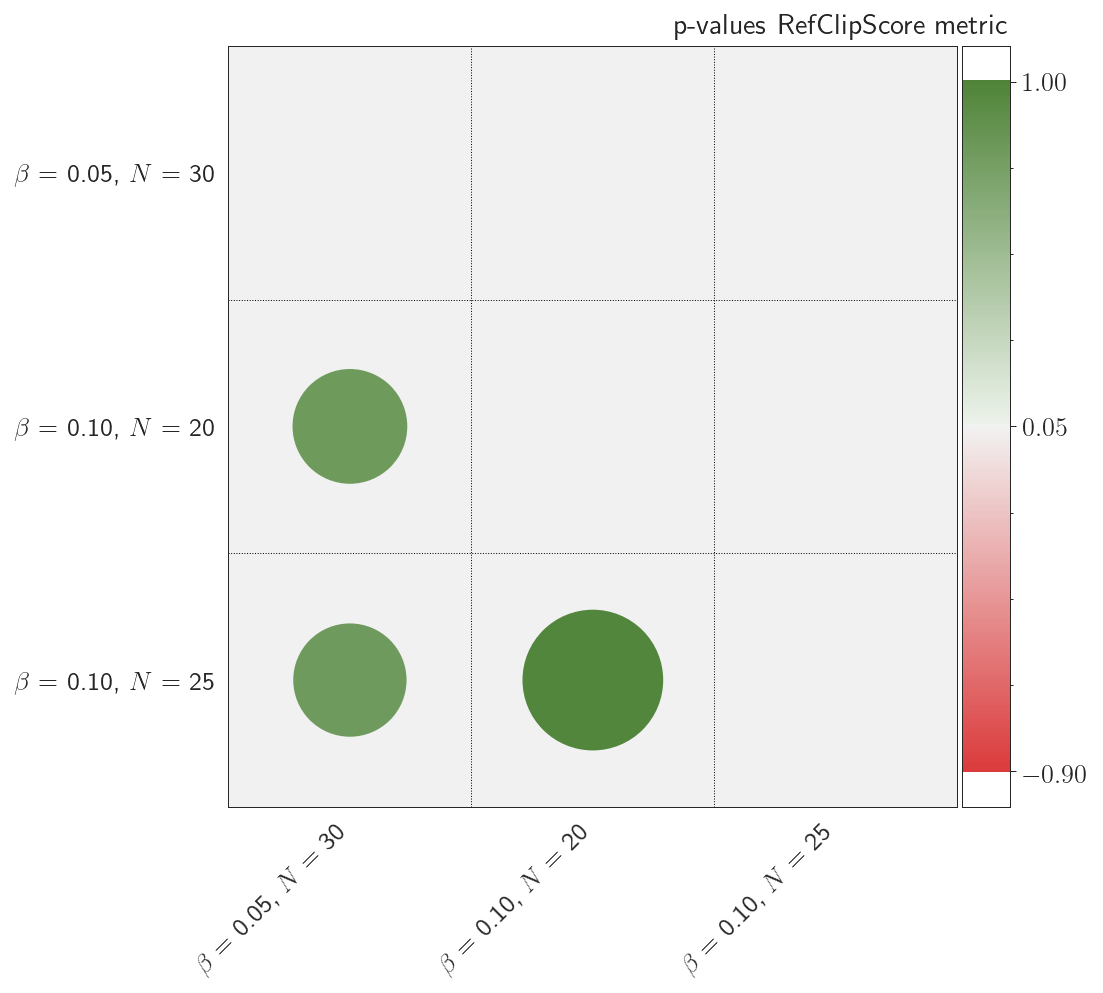

In [75]:
with plt.style.context('science'):
    sns.set_style('white', {"grid.color": "0", "grid.linestyle": ":", "grid.color": 'black',
                        'axes.facecolor': '#FFFFFF'})
    fig = plt.figure(figsize=(7,7), facecolor=(1, 1, 1))
    plot_matrix(matrix_df, 'p-values RefClipScore metric')
    plt.grid(False)